In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Activation
from keras import optimizers

In [3]:
from sklearn.utils import shuffle
import random
import matplotlib.image as mpimg

In [4]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [5]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [6]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [7]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [8]:
# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

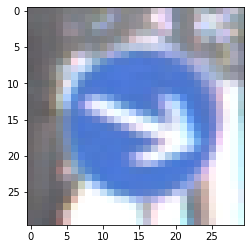

In [17]:
i=np.random.randint(1,len(X_train))
plt.imshow(X_train[i])

In [18]:
X_train,y_train = shuffle(X_train,y_train)

In [19]:
# convert image into grayscale
X_train_grayscale = np.zeros(X_train.shape[:-1])
for i in range(X_train.shape[0]):
    X_train_grayscale[i] = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2GRAY)

In [20]:
X_test_grayscale = np.zeros(X_test.shape[:-1])
for i in range(X_test.shape[0]):
    X_test_grayscale[i] = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2GRAY)

In [21]:
# image normalization
X_train_grayscale_norm = (X_train_grayscale - 255)/255 
X_test_grayscale_norm = (X_test_grayscale - 255)/255

<Figure size 432x288 with 0 Axes>

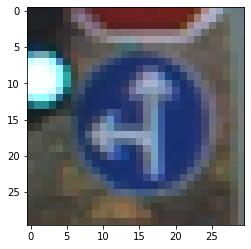

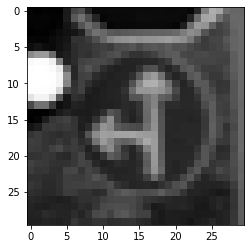

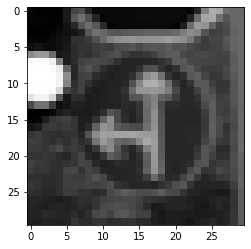

<Figure size 432x288 with 0 Axes>

In [23]:
i = random.randint(1, len(X_train_grayscale))
plt.imshow(X_train[i])
plt.figure()

plt.imshow(X_train_grayscale[i].squeeze(), cmap = 'gray')
plt.figure()

plt.imshow(X_train_grayscale_norm[i].squeeze(), cmap = 'gray')
plt.figure()

In [24]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding = 'valid', strides = (1,1),input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'valid', strides = (1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'valid', strides = (1,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(43, activation='softmax'))

In [25]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, batch_size = 32, epochs =15, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 61s 59ms/step - loss: 3.0966 - accuracy: 0.2638 - val_loss: 1.3149 - val_accuracy: 0.6145
Epoch 2/15
981/981 [==============================] - 57s 58ms/step - loss: 1.2032 - accuracy: 0.6339 - val_loss: 0.5026 - val_accuracy: 0.8453
Epoch 3/15
981/981 [==============================] - 56s 57ms/step - loss: 0.7130 - accuracy: 0.7834 - val_loss: 0.2886 - val_accuracy: 0.9276
Epoch 4/15
981/981 [==============================] - 57s 58ms/step - loss: 0.5498 - accuracy: 0.8340 - val_loss: 0.2001 - val_accuracy: 0.9450
Epoch 5/15
981/981 [==============================] - 56s 57ms/step - loss: 0.4394 - accuracy: 0.8710 - val_loss: 0.1620 - val_accuracy: 0.9579
Epoch 6/15
981/981 [==============================] - 57s 59ms/step - loss: 0.4087 - accuracy: 0.8829 - val_loss: 0.1463 - val_accuracy: 0.9638
Epoch 7/15
981/981 [==============================] - 56s 57ms/step - loss: 0.3516 - accuracy: 0.8995 - val_loss: 0.1547 - val_accuracy:

In [27]:
model.save("trafic_sign_classification.h5")

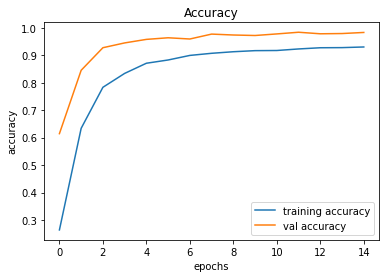

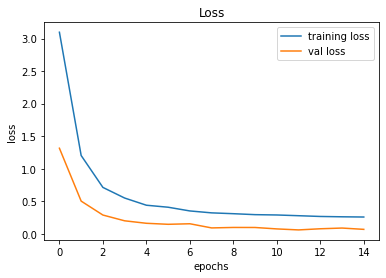

In [28]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
          

In [44]:
# testing accuracy on test dataset

from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

In [45]:
X_test=np.array(data)

In [46]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
pred = np.argmax(model.predict(X_test),axis=1)
print('accuracy score')
print(accuracy_score(labels, pred))

accuracy score
0.9472684085510689


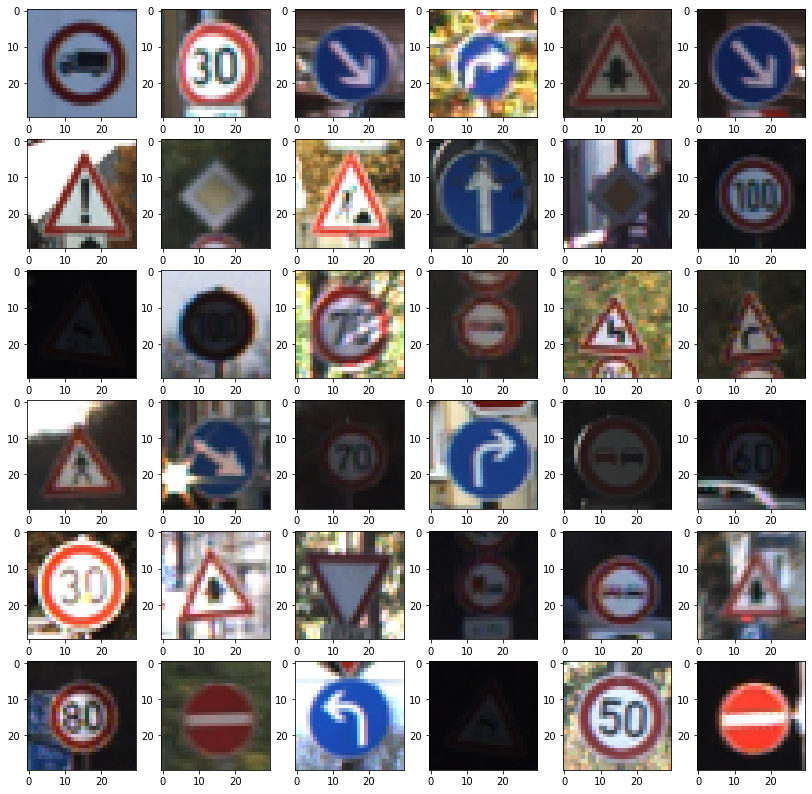

In [47]:
plt.figure(figsize=(14,14))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(X_test[i])

In [48]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

2700
The predicted image is Stop


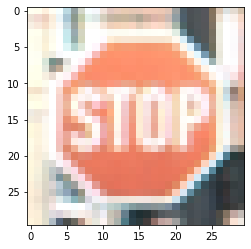

In [54]:
# prediction with test data
image_index=random.randint(1, len(X_test_grayscale_norm))

plt.imshow(X_test[image_index])
n = np.array(X_test[image_index])
print(n.size)
p = n.reshape(1, 30, 30, 3)
pred = classes[model.predict(p).argmax()]

print("The predicted image is {}".format(pred))